#NLP Assignmnet 4 <br>
Name : Krishna Kant Verma</br>
Roll No: 2211cs19</br>
Name : Gourab Chatterjee</br>
Roll No: 2211cs08

`Importing libraries Used for this Assignmnemt`

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.layers import Dense,SimpleRNN
from keras.models import Sequential

`Reading text dataset file`

In [2]:
with open("names.txt",'r') as f:
    data=f.readlines()
data=[text.strip('\n')+'.' for text in data]

#Creating Dataset

In [4]:
def createDataset(data,ngram):
    X=[]
    Y=[]
    for text in data:
        pointer=0
        while pointer+ngram<len(text):
            X.append(text[pointer:pointer+ngram])
            Y.append(text[pointer+ngram])
            pointer+=1
    ctoi={char:ind for ind,char in enumerate(sorted(set(Y)))}

    X = [[to_categorical(ctoi[charector],27) for charector in  text_data] for text_data in X]
    X = np.array(X)
    Y = [to_categorical(ctoi[charector],27) for charector in Y]
    Y = np.array(Y)
    X = X.reshape((X.shape[0],X.shape[1]*X.shape[2]))
    fd=np.concatenate([X,Y],axis=1)
    np.random.shuffle(fd)
    part1=int(fd.shape[0]*0.9)
    part2=part1+int(fd.shape[0]*0.05)
    return np.split(fd,[part1,part2]),ctoi

In [5]:
def createModel(ngram):
    def perplexityLoss(y_true, y_pred):
        crossEntropyError = K.categorical_crossentropy(y_true, y_pred)
        perplexity = K.pow(np.e, crossEntropyError)
        return perplexity

    model = Sequential([
        Dense(128,input_shape=(27*ngram,),activation='relu'),
        Dense(64,activation='relu'),
        Dense(27,activation='softmax'),
    ])

    model.compile(optimizer='adam',loss=perplexityLoss,metrics=['accuracy'])
    return model  

# Bi-Gram Model

In [6]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', restore_best_weights=True)
(train,test,val),ctoi=createDataset(data,2)

model_2gram = createModel(2)
gram2His = model_2gram.fit(train[:,:27*2],train[:,27*2:],
                  validation_data=[val[:,:27*2],val[:,27*2:]],
                  epochs=30,callbacks=[earlyStopping])

Epoch 1/30
4615/4615 [==============================] - 22s 4ms/step - loss: 14.9820 - accuracy: 0.2846 - val_loss: 13.9648 - val_accuracy: 0.3108
Epoch 2/30
4615/4615 [==============================] - 17s 4ms/step - loss: 14.0582 - accuracy: 0.3018 - val_loss: 13.7984 - val_accuracy: 0.3141
Epoch 3/30
4615/4615 [==============================] - 17s 4ms/step - loss: 13.8139 - accuracy: 0.3037 - val_loss: 13.6218 - val_accuracy: 0.3200
Epoch 4/30
4615/4615 [==============================] - 17s 4ms/step - loss: 13.6947 - accuracy: 0.3085 - val_loss: 13.5367 - val_accuracy: 0.3181
Epoch 5/30
4615/4615 [==============================] - 17s 4ms/step - loss: 13.5907 - accuracy: 0.3077 - val_loss: 13.5307 - val_accuracy: 0.3206
Epoch 6/30
4615/4615 [==============================] - 17s 4ms/step - loss: 13.5065 - accuracy: 0.3092 - val_loss: 13.5112 - val_accuracy: 0.3184
Epoch 7/30
4615/4615 [==============================] - 17s 4ms/step - loss: 13.4531 - accuracy: 0.3101 - val_loss: 13

#Tri-Gram-Model

In [7]:
(train,test,val),ctoi=createDataset(data,3)
m3gram = createModel(3)
gram3His = m3gram.fit(train[:,:27*3],train[:,27*3:],
                  validation_data=[val[:,:27*3],val[:,27*3:]],
                  epochs=30,callbacks=[earlyStopping])

Epoch 1/30
3714/3714 [==============================] - 14s 4ms/step - loss: 13.5287 - accuracy: 0.3288 - val_loss: 12.5871 - val_accuracy: 0.3523
Epoch 2/30
3714/3714 [==============================] - 13s 4ms/step - loss: 12.1345 - accuracy: 0.3642 - val_loss: 12.2593 - val_accuracy: 0.3721
Epoch 3/30
3714/3714 [==============================] - 13s 4ms/step - loss: 11.6509 - accuracy: 0.3739 - val_loss: 12.1656 - val_accuracy: 0.3703
Epoch 4/30
3714/3714 [==============================] - 13s 3ms/step - loss: 11.3365 - accuracy: 0.3792 - val_loss: 12.0789 - val_accuracy: 0.3813
Epoch 5/30
3714/3714 [==============================] - 13s 3ms/step - loss: 11.0625 - accuracy: 0.3838 - val_loss: 12.2629 - val_accuracy: 0.3845
Epoch 6/30
3714/3714 [==============================] - 13s 4ms/step - loss: 10.8704 - accuracy: 0.3859 - val_loss: 12.2798 - val_accuracy: 0.3900
Epoch 7/30
3714/3714 [==============================] - 17s 5ms/step - loss: 10.7036 - accuracy: 0.3879 - val_loss: 13

In [8]:
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', restore_best_weights=True)
def create_RNN_model(ngram):
    def perplexityLoss(y_true, y_pred):
        crossEntropyError = K.categorical_crossentropy(y_true, y_pred)
        perplexity = K.pow(np.e, crossEntropyError)
        return perplexity
    model = Sequential([
        SimpleRNN(128,input_shape=(ngram,27),activation='relu'),
        Dense(27,activation='softmax'),
    ])

    model.compile(optimizer='adam',loss=perplexityLoss,metrics=['accuracy'])
    return model  

In [9]:
ngram = 3
(train,test,val),ctoi=createDataset(data,ngram)
m2RNNgram = create_RNN_model(ngram)
m2RNNgram.fit(train[:,:27*ngram].reshape(train.shape[0],ngram,27),train[:,27*ngram:],
          validation_data=[val[:,:27*ngram].reshape(val.shape[0],ngram,27),val[:,27*ngram:]],
          epochs=30,callbacks=[earlyStopping])

Epoch 1/30
3714/3714 [==============================] - 24s 6ms/step - loss: 13.7448 - accuracy: 0.3232 - val_loss: 12.9301 - val_accuracy: 0.3591
Epoch 2/30
3714/3714 [==============================] - 21s 6ms/step - loss: 12.3523 - accuracy: 0.3551 - val_loss: 12.6466 - val_accuracy: 0.3680
Epoch 3/30
3714/3714 [==============================] - 22s 6ms/step - loss: 11.8328 - accuracy: 0.3659 - val_loss: 12.2520 - val_accuracy: 0.3742
Epoch 4/30
3714/3714 [==============================] - 23s 6ms/step - loss: 11.5165 - accuracy: 0.3735 - val_loss: 12.8114 - val_accuracy: 0.3765
Epoch 5/30
3714/3714 [==============================] - 22s 6ms/step - loss: 11.2586 - accuracy: 0.3766 - val_loss: 13.1812 - val_accuracy: 0.3759
Epoch 6/30
3714/3714 [==============================] - 21s 6ms/step - loss: 11.0650 - accuracy: 0.3798 - val_loss: 12.6991 - val_accuracy: 0.3841
Epoch 7/30
3714/3714 [==============================] - 22s 6ms/step - loss: 10.8893 - accuracy: 0.3831 - val_loss: 12

#Plots

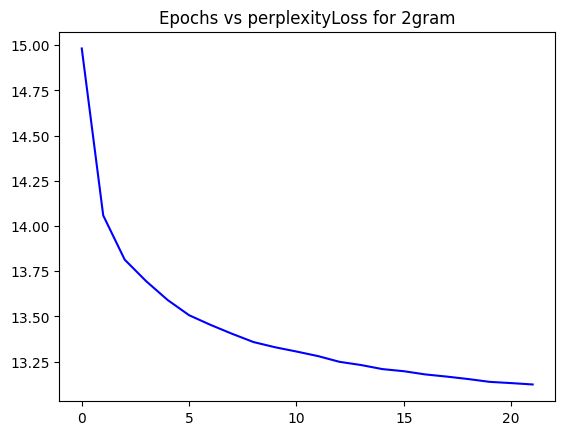

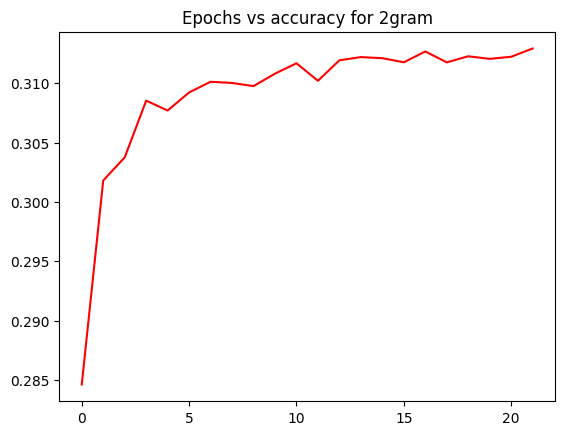

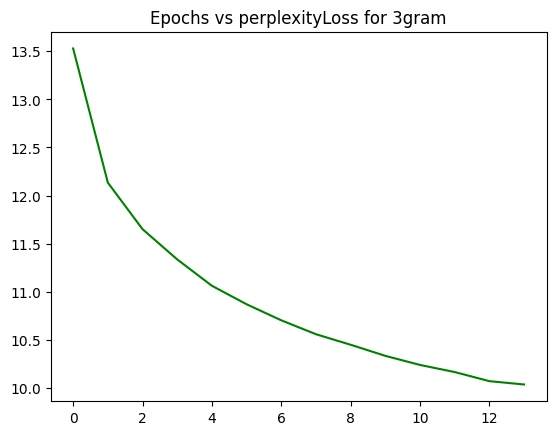

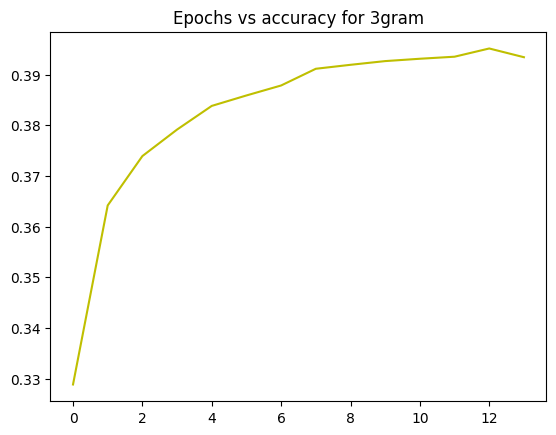

In [10]:
import matplotlib.pyplot as plt
plt.plot([x for x in range(len(gram2His.history['loss']))],gram2His.history['loss'],c='b')
plt.title("Epochs vs perplexityLoss for 2gram")
plt.x_label="Epochs"
plt.y_label="Loss"
plt.show()
plt.plot([x for x in range(len(gram2His.history['accuracy']))],gram2His.history['accuracy'],c='r')
plt.title("Epochs vs accuracy for 2gram")
plt.x_label="Epochs"
plt.y_label="Loss"
plt.show()
plt.plot([x for x in range(len(gram3His.history['loss']))],gram3His.history['loss'],c='g')
plt.title("Epochs vs perplexityLoss for 3gram")
plt.x_label="Epochs"
plt.y_label="Loss"
plt.show()
plt.plot([x for x in range(len(gram3His.history['accuracy']))],gram3His.history['accuracy'],c='y')
plt.title("Epochs vs accuracy for 3gram")
plt.x_label="Epochs"
plt.y_label="Loss"
plt.show()

#Thank You So Much